In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [3]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.keras'

In [4]:
NUM_CLASSES = 8

In [5]:
TIME_STEPS = 16
DIMENSION = 2

In [6]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [7]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [9]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

/home/tigo/.local/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-01-30 13:08:16.430132: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [10]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,130 (4.41 KB)

 Trainable params: 1,130 (4.41 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2367 - loss: 2.0747
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2610 - loss: 2.0634 - val_accuracy: 0.4479 - val_loss: 1.9871
Epoch 2/1000
23/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3932 - loss: 1.9644 
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3965 - loss: 1.9542 - val_accuracy: 0.4577 - val_loss: 1.8736
Epoch 3/1000
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4243 - loss: 1.8582 
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4236 - loss: 1.8443 - val_accuracy: 0.4781 - val_loss: 1.7402
Epoch 4/1000
23/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4243 - loss: 1.7241 
Epoch 4: saving model to model/point_history_c

Epoch 24/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6135 - loss: 0.9740 
Epoch 24: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6138 - loss: 0.9699 - val_accuracy: 0.8174 - val_loss: 0.7952
Epoch 25/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6182 - loss: 0.9637 
Epoch 25: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6200 - loss: 0.9599 - val_accuracy: 0.8168 - val_loss: 0.7833
Epoch 26/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6312 - loss: 0.9288 
Epoch 26: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6334 - loss: 0.9306 - val_accuracy: 0.8205 - val_loss: 0.7673
Epoch 27/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6182 - loss: 0.9391 
Epoch 27: saving model to model/point_h

Epoch 47/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7068 - loss: 0.8059 
Epoch 47: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7029 - loss: 0.8021 - val_accuracy: 0.8828 - val_loss: 0.5574
Epoch 48/1000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7022 - loss: 0.7992
Epoch 48: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.7023 - loss: 0.7991 - val_accuracy: 0.8791 - val_loss: 0.5518
Epoch 49/1000
23/38 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6924 - loss: 0.7807
Epoch 49: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6940 - loss: 0.7795 - val_accuracy: 0.8791 - val_loss: 0.5431
Epoch 50/1000
22/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6995 - loss: 0.8159 
Epoch 50: saving model to model/poin

Epoch 70/1000
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7364 - loss: 0.7137 
Epoch 70: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7358 - loss: 0.7089 - val_accuracy: 0.8908 - val_loss: 0.4449
Epoch 71/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7407 - loss: 0.6721 
Epoch 71: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7380 - loss: 0.6849 - val_accuracy: 0.8920 - val_loss: 0.4456
Epoch 72/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.7008 
Epoch 72: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7373 - loss: 0.7021 - val_accuracy: 0.8890 - val_loss: 0.4448
Epoch 73/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - loss: 0.7019 
Epoch 73: saving model to model/point_h

Epoch 93/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7396 - loss: 0.7025 
Epoch 93: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7452 - loss: 0.6919 - val_accuracy: 0.9007 - val_loss: 0.3931
Epoch 94/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7461 - loss: 0.6607 
Epoch 94: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7473 - loss: 0.6607 - val_accuracy: 0.9013 - val_loss: 0.3919
Epoch 95/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7545 - loss: 0.6773 
Epoch 95: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7546 - loss: 0.6775 - val_accuracy: 0.9013 - val_loss: 0.3925
Epoch 96/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7550 - loss: 0.6974 
Epoch 96: saving model to model/point_h

Epoch 116/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7636 - loss: 0.6148 
Epoch 116: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7624 - loss: 0.6249 - val_accuracy: 0.9056 - val_loss: 0.3744
Epoch 117/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.6126 
Epoch 117: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7714 - loss: 0.6189 - val_accuracy: 0.9044 - val_loss: 0.3713
Epoch 118/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7608 - loss: 0.6235 
Epoch 118: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7611 - loss: 0.6321 - val_accuracy: 0.9093 - val_loss: 0.3733
Epoch 119/1000
18/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7798 - loss: 0.6385 
Epoch 119: saving model to model

Epoch 139/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.6050 
Epoch 139: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7758 - loss: 0.6155 - val_accuracy: 0.9062 - val_loss: 0.3600
Epoch 140/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.6160 
Epoch 140: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7733 - loss: 0.6222 - val_accuracy: 0.9031 - val_loss: 0.3558
Epoch 141/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.5947 
Epoch 141: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7914 - loss: 0.6006 - val_accuracy: 0.9056 - val_loss: 0.3585
Epoch 142/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7610 - loss: 0.6455 
Epoch 142: saving model to model

Epoch 162/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7777 - loss: 0.6200 
Epoch 162: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7790 - loss: 0.6144 - val_accuracy: 0.9099 - val_loss: 0.3470
Epoch 163/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7977 - loss: 0.5674 
Epoch 163: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7937 - loss: 0.5794 - val_accuracy: 0.9130 - val_loss: 0.3447
Epoch 164/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7735 - loss: 0.6014 
Epoch 164: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7740 - loss: 0.6026 - val_accuracy: 0.9056 - val_loss: 0.3523
Epoch 165/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7878 - loss: 0.5905 
Epoch 165: saving model to model

Epoch 185/1000
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.5712 
Epoch 185: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7898 - loss: 0.5808 - val_accuracy: 0.9019 - val_loss: 0.3409
Epoch 186/1000
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.5800 
Epoch 186: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7896 - loss: 0.5837 - val_accuracy: 0.9105 - val_loss: 0.3380
Epoch 187/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.6087 
Epoch 187: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7790 - loss: 0.6068 - val_accuracy: 0.9050 - val_loss: 0.3376
Epoch 188/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.5671 
Epoch 188: saving model to model

Epoch 208/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8001 - loss: 0.5769 
Epoch 208: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7957 - loss: 0.5815 - val_accuracy: 0.9093 - val_loss: 0.3265
Epoch 209/1000
26/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7844 - loss: 0.6057 
Epoch 209: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.6007 - val_accuracy: 0.9118 - val_loss: 0.3277
Epoch 210/1000
27/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7897 - loss: 0.5827 
Epoch 210: saving model to model/point_history_classifier/point_history_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7871 - loss: 0.5844 - val_accuracy: 0.9136 - val_loss: 0.3302
Epoch 211/1000
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.6045 
Epoch 211: saving model to model

In [14]:
model = tf.keras.models.load_model(model_save_path)

In [15]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[1.57788435e-10 3.02236323e-04 8.23353827e-01 1.63537696e-01
 1.28060738e-02 2.15580549e-08 1.00994676e-07 2.61991695e-09]
2


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


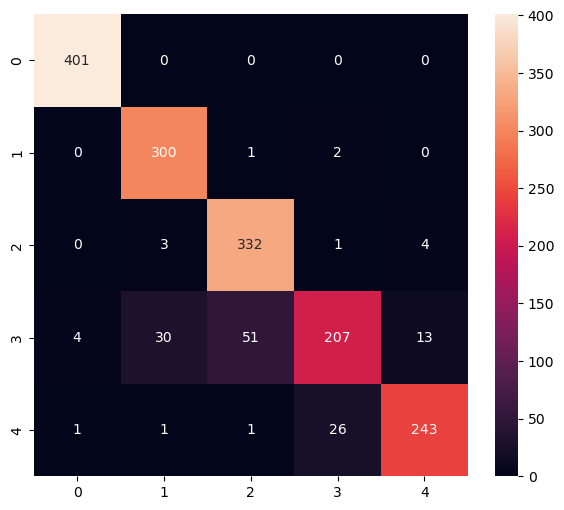

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       401
           1       0.90      0.99      0.94       303
           2       0.86      0.98      0.92       340
           3       0.88      0.68      0.77       305
           4       0.93      0.89      0.91       272

    accuracy                           0.91      1621
   macro avg       0.91      0.91      0.91      1621
weighted avg       0.91      0.91      0.91      1621



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [17]:

model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [18]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [19]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmp8zl7x5d4/assets


INFO:tensorflow:Assets written to: /tmp/tmp8zl7x5d4/assets


Saved artifact at '/tmp/tmp8zl7x5d4'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  140245413934480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245413936784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245413936400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245413934864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245404189136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140245404190288: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1738238957.138695  446833 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1738238957.138729  446833 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-30 13:09:17.139063: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp8zl7x5d4
2025-01-30 13:09:17.139765: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-30 13:09:17.139781: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp8zl7x5d4
I0000 00:00:1738238957.144332  446833 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2025-01-30 13:09:17.145325: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-30 13:09:17.173085: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp8zl7x5d4
2025-01-30 13:09:17.182344: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

6620

In [20]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [21]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_layer:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [22]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [23]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 266 µs, sys: 18 µs, total: 284 µs
Wall time: 214 µs


In [24]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5778842e-10 3.0223629e-04 8.2335377e-01 1.6353776e-01 1.2806079e-02
 2.1558051e-08 1.0099476e-07 2.6199167e-09]
2
